# Partial Solution: RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
# This code imports the data you generated before for replicating.

stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')

diff_T = stock_prices['T'].diff().dropna()

split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [3]:
n_steps = 10
n_features = 1

In [4]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:

X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In [6]:
def RNN_part():
    model = Sequential()
    model.add(SimpleRNN(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error', metrics=['mse'])
    return model

In [7]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 1s 190ms/step - loss: 0.3855 - mse: 0.3855 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 2/200
2/2 [==============================] - 0s 24ms/step - loss: 0.3285 - mse: 0.3285 - val_loss: 0.1120 - val_mse: 0.1120
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.2916 - mse: 0.2916 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 0.2681 - mse: 0.2681 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 5/200
2/2 [==============================] - 0s 42ms/step - loss: 0.2270 - mse: 0.2270 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1992 - mse: 0.1992 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 7/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1927 - mse: 0.1927 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 8/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1721 - mse: 0.1

Epoch 62/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.9387e-05 - val_mse: 8.9387e-05
Epoch 63/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 1.1515e-04 - val_mse: 1.1515e-04
Epoch 64/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 1.3150e-04 - val_mse: 1.3150e-04
Epoch 65/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 1.5746e-04 - val_mse: 1.5746e-04
Epoch 66/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 1.0433e-04 - val_mse: 1.0433e-04
Epoch 67/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 1.1021e-04 - val_mse: 1.1021e-04
Epoch 68/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 1.7036e-04 - val_mse: 1.7036e-04
Epoch 69/200
2/2 [=========

Epoch 121/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 1.9760e-04 - val_mse: 1.9760e-04
Epoch 122/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 1.2257e-04 - val_mse: 1.2257e-04
Epoch 123/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 2.1576e-04 - val_mse: 2.1576e-04
Epoch 124/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 1.5020e-04 - val_mse: 1.5020e-04
Epoch 125/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.9542e-05 - val_mse: 9.9542e-05
Epoch 126/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 1.7498e-04 - val_mse: 1.7498e-04
Epoch 127/200
2/2 [==============================] - 0s 27ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 2.2225e-04 - val_mse: 2.2225e-04
Epoch 128/200
2/2 [=

2/2 [==============================] - 0s 22ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 1.6982e-04 - val_mse: 1.6982e-04
Epoch 180/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 2.0111e-04 - val_mse: 2.0111e-04
Epoch 181/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 1.1880e-04 - val_mse: 1.1880e-04
Epoch 182/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 1.0344e-04 - val_mse: 1.0344e-04
Epoch 183/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 1.8806e-04 - val_mse: 1.8806e-04
Epoch 184/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 1.4149e-04 - val_mse: 1.4149e-04
Epoch 185/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 1.2177e-04 - val_mse: 1.2177e-04
Epoch 186/200
2/2 [===============

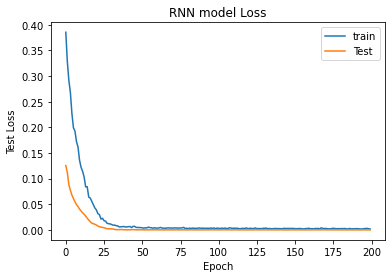

In [8]:
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('RNN model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Let me run `callback` function to see the effect of early stopping in deep learning. 
Early stopping is a tool to employ against overfitting in the sense that it helps us to regularize the model.

The other pros of early stopping is to save time, because training a deep learning model takes time. In early stopping, once the model reaches the target performance, the algorithm automatically stops. In other word, thanks to `patience` paramater below, training stops after the number of epochs without improvement.


In [9]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [10]:
RNN_model = RNN_part()
history_RNN = RNN_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2, 
                            callbacks=[callback])

Epoch 1/200
2/2 [==============================] - 1s 174ms/step - loss: 0.3724 - mse: 0.3724 - val_loss: 0.1289 - val_mse: 0.1289


In [11]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [12]:
predictions_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat = RNN_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat)
    T_input = T_input[1:]
    predictions_T.append(yhat)

In [13]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [14]:
print('RMSE of AT&T for RNN model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_T).flatten())))

RMSE of AT&T for RNN model 0.4540
